# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_all_var_final.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,2,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
1,3,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.90
2,4,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.00
3,5,000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0,5.0,58.90
4,6,000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0,5.0,199.00


In [6]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Check columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30264 entries, 0 to 30263
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  30264 non-null  object 
 1   units_sold                  30264 non-null  int64  
 2   product_photos_qty          30264 non-null  float64
 3   product_name_length         30264 non-null  float64
 4   product_description_length  30264 non-null  float64
 5   review_score                30264 non-null  float64
 6   item_price                  30264 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [8]:
# Change types for data set

df['product_photos_qty']=df['product_photos_qty'].astype('int64')
df['product_name_length']=df['product_name_length'].astype('int64')
df['product_description_length']=df['product_description_length'].astype('int64')

# 03. Create a new table with products that have sold more than 2 units

#### I'll exclude products that have sold less than 5 units

In [9]:
# create a subset that only contains data from products that have sold more than 2 units

df =  df[df['units_sold']>2]

In [10]:
# Check table stats

df['units_sold'].describe()

count    8230.000000
mean        9.137910
std        18.643773
min         3.000000
25%         3.000000
50%         5.000000
75%         8.000000
max       522.000000
Name: units_sold, dtype: float64

In [11]:
# Export dataset with new columns

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_max_items_1_min_units_3.csv'))

In [12]:
# Import data

df_corr = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_max_items_1_min_units_3.csv'), index_col = False)

In [13]:
# Check dataset

df_corr.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,6,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000
1,8,001b72dfd63e9833e8c02742adf472e3,13,3,45,520,3.384615,34.990000
2,10,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.000000,33.485000
3,11,002159fe700ed3521f46cfcf6e941c76,7,3,55,344,3.428571,202.700000
4,13,00250175f79f584c14ab5cecd80553cd,11,2,53,631,4.454545,75.444545


In [14]:
# Drop columns

df_corr = df_corr.drop(columns = ['Unnamed: 0','product_id'])

In [15]:
# Check output

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   units_sold                  8230 non-null   int64  
 1   product_photos_qty          8230 non-null   int64  
 2   product_name_length         8230 non-null   int64  
 3   product_description_length  8230 non-null   int64  
 4   review_score                8230 non-null   float64
 5   item_price                  8230 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 385.9 KB


# 04. Explore relationships Part 3

## Create a correlation heatmap using seaborn:

In [16]:
# Create a correlation matrix using pandas

df_corr.corr()

,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
units_sold,1.000000,0.000088,0.002613,0.005422,-0.000626,-0.029938
product_photos_qty,0.000088,1.000000,0.153600,0.131629,0.041706,0.047651
product_name_length,0.002613,0.153600,1.000000,0.090924,-0.021699,0.020947
product_description_length,0.005422,0.131629,0.090924,1.000000,-0.005202,0.213599
review_score,-0.000626,0.041706,-0.021699,-0.005202,1.000000,-0.032722
item_price,-0.029938,0.047651,0.020947,0.213599,-0.032722,1.000000


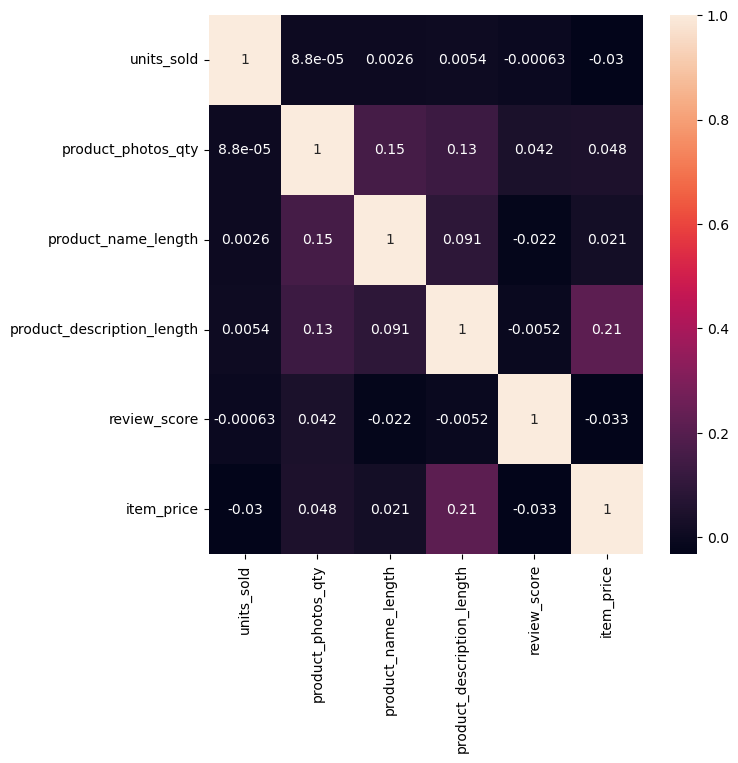

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## Scatterplots:

### I'll create a scaterplot for units sold and review score

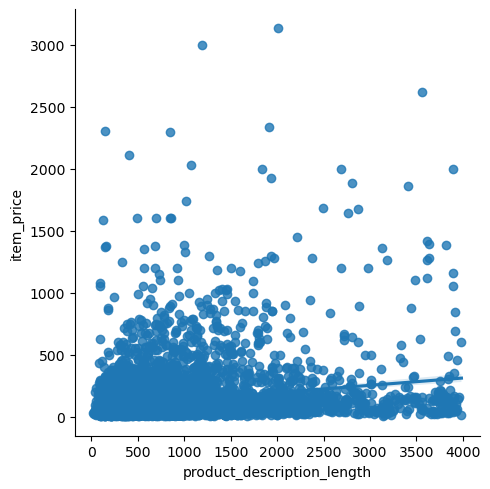

In [18]:
# Create a scatterplot for the "units sold" and "price per item" columns in seaborn

sns.lmplot(x = 'product_description_length', y = 'item_price', data = df_corr)

#### The scarterplot shows that there's a linear weak relationship between price and product description

## Pair Plots:

In [19]:
# Keep only price, units sold, number of pictures and review score

df_corr_2 = df_corr[['units_sold', 'product_photos_qty', 'review_score', 'item_price','product_description_length']]

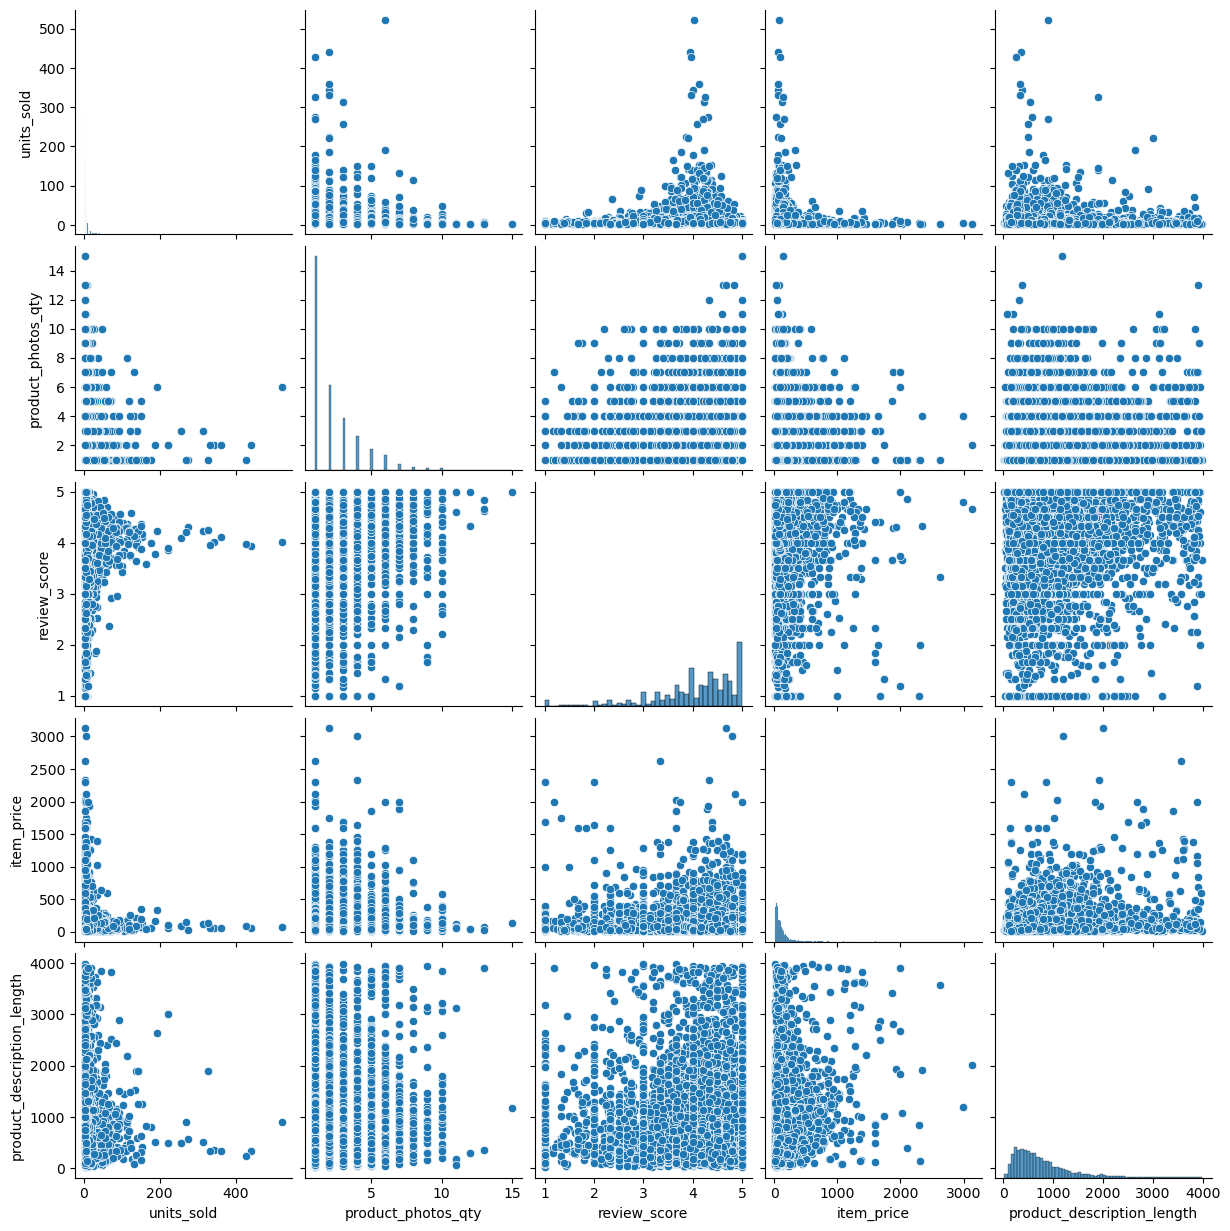

In [20]:
# Create a pair plot 

g = sns.pairplot(df_corr_2)

## Categorical plots:

<Axes: xlabel='units_sold', ylabel='Count'>

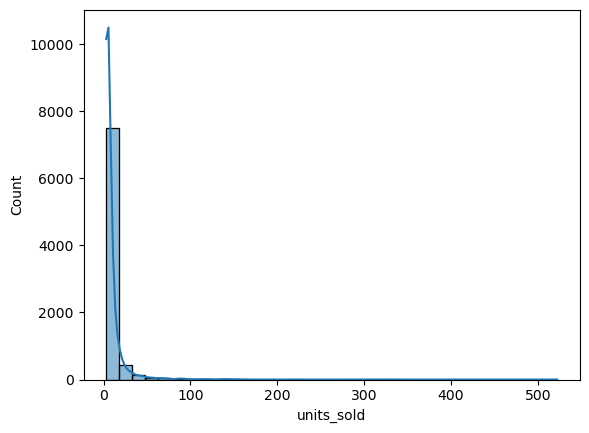

In [21]:
# Create histogram for price

sns.histplot(df_corr['units_sold'], bins = 35, kde = True)

In [22]:
df_corr.loc[df_corr['units_sold'] < 4, 'type_of_product'] = 'Low Sales Product'

In [23]:
df_corr.loc[(df_corr_2['units_sold'] >= 4) & (df_corr['units_sold'] <7), 'type_of_product'] = 'Medium Sales Product'

In [24]:
df_corr.loc[df_corr_2['units_sold'] >= 7, 'type_of_product'] = 'High Sales Product'

In [25]:
df_corr.head()

,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,type_of_product
0,9,1,53,274,3.222222,38.900000,High Sales Product
1,13,3,45,520,3.384615,34.990000,High Sales Product
2,7,6,56,3893,4.000000,33.485000,High Sales Product
3,7,3,55,344,3.428571,202.700000,High Sales Product
4,11,2,53,631,4.454545,75.444545,High Sales Product


In [26]:
df_agg = df_corr.groupby('type_of_product').agg({'units_sold': ['count']})

In [27]:
df_agg

,units_sold
,count
type_of_product,
High Sales Product,2810
Low Sales Product,2410
Medium Sales Product,3010


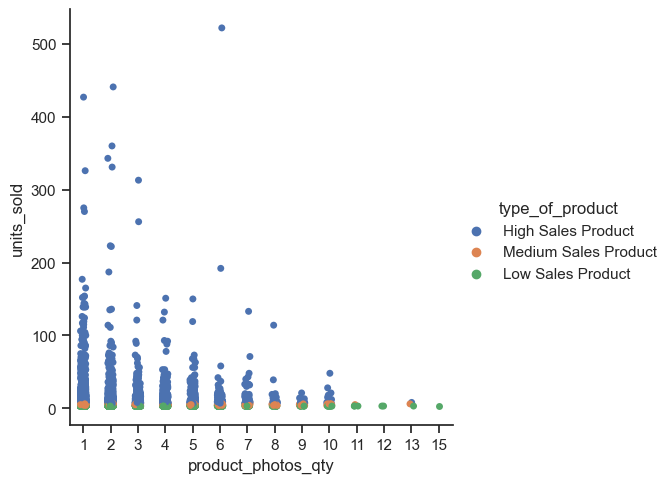

In [28]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="product_photos_qty", y="units_sold", hue="type_of_product", data=df_corr)

# 05. Conclusions

#### When excluding products that have had only a few items sold, the results show no significant relationship between variables.

### Answering questions from task 6.1

#### •	Is there a relationship between the number of pictures published per product and sales?
####  There's no relationship (0.000088 coefficient) between the number of pictures published and units sold

#### •	Is there a relationship between the length of the product description and units sold?
#### There's no relationship (-0.0054) between the length of the product description and units sold

# 06. Next steps

#### I'll create category subsets to look at the relationship between variables within specific categories to see if they reveal any significant patterns.